# TF-IDF

---

1. Environment Setup  
2. TF-IDF
- (1). Bag-of-Words  
- (2). TF-IDF  
- (3). TfidfVectorizer

## BOW (Bag-of-Words) term frequency

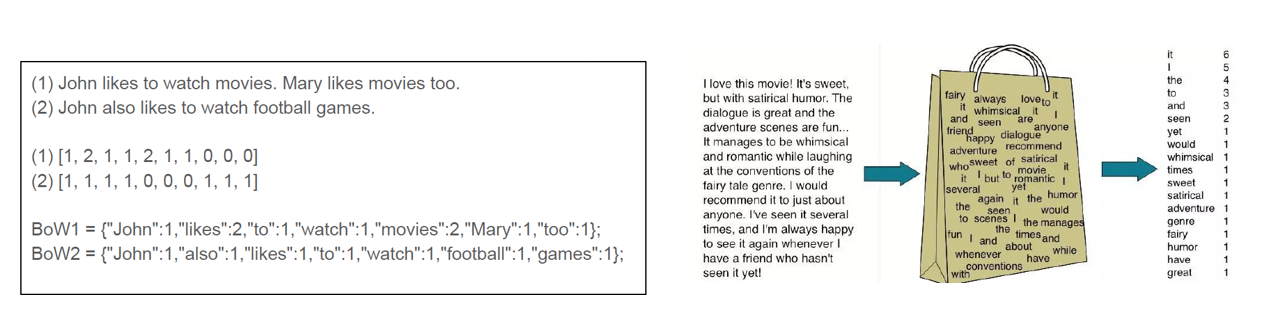

## TF-IDF

**TF-IDF (Term Frequency - Inverse Document Frequency)**<br>
</br>
$$\mathrm{tf}_{t,d} = \begin{cases}
1+\log\mathrm{count}(t,d) & \mathrm{if}\;\mathrm{count}(t,d)>0 \\
0 & \mathrm{otherwise}\\
\end{cases}$$ <br>
$$ \mathrm{idf}_t = \log(\frac{N}{\mathrm{df_t}}) $$ </br>
$$ w_{t,d}=\mathrm{tf}_{t,d}×\mathrm{idf}_t $$

---

- A method to overcome the limitation of BoW, which only uses word frequency  
- Assigns a higher weight to words that appear frequently in one document (TF) but rarely across all other documents (IDF)  
- In other words, the more representative a word is of the document’s topic, the higher its value will be

## 1. Enviroment Setup

In [ ]:
import pandas as pd
from math import log
from sklearn.model_selection import train_test_split
import re

### Practice Dataset - IMDb Movie Reviews

In [ ]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import pandas as pd

# Load IMDb dataset (only documents)
docs = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# Put into DataFrame
data = pd.DataFrame({'document': docs})

data.head()

In [ ]:
# Check data samples
data = data.sample(n=20, random_state=42)

print("Data samples:")
print(data.head())

In [ ]:
# Download NLTK tokenizers
nltk.download('punkt')       # Sentence & word tokenizer for English
nltk.download('punkt_tab')

In [ ]:
docs = data['document'].tolist()
tokenized_docs = [nltk.word_tokenize(doc) for doc in docs]

# Build the vocabulary
vocab = list(set(w for doc in tokenized_docs for w in doc))
#vocab = [w for w in vocab if re.match("^[A-Za-z]+$", w)]   # Keep only alphabetic words
vocab = sorted(vocab)

In [ ]:
print("First document tokenization result:")
print(tokenized_docs[0][:50])   # Show first 50 tokens

print("\nNumber of documents:", len(tokenized_docs))   # Print number of documents
print("\nVocabulary size:", len(vocab))
print("Vocabulary sample:", vocab[:50])   # Show first 50 words in vocabulary

## 2. BOW & TF-IDF (Practice)

### (1) Bag-of-Words

In [ ]:
bow_matrix = []
for doc in tokenized_docs:
    row = ???               # Complete the code
    bow_matrix.append(row)

bow_df = pd.DataFrame(bow_matrix, columns=vocab)

In [ ]:
print("\n=== BoW ===")
print(bow_df)

### (2) TF-IDF (Python functions)

In [ ]:
# TF (Term Frequency)
def tf(t, d):
    # Complete the code
    ???
    return ???

# IDF (Inverse Document Frequency)
def idf(t, docs):
    # Complete the code
    ???
    return ???

# TF-IDF calculation
def tfidf(t, d, docs):
    # Complete the code
    ???
    return ???

In [ ]:
# Compute TF-IDF matrix
tfidf_matrix = []
for doc in tokenized_docs:   # Iterate through documents
    row = []
    for j in range(len(vocab)):
        t = vocab[j]
        row.append(tfidf(t, doc, tokenized_docs))
    tfidf_matrix.append(row)

tfidf_df = pd.DataFrame(tfidf_matrix, columns=vocab)

In [ ]:
print("\n=== TF-IDF ===")
print(tfidf_df)

### (3) Implementing TF-IDF using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(
    stop_words='english',   # Remove stopwords: exclude common words like the, is, and
    # min_df=1,             # Minimum document frequency: include words that appear in at least 1 document
    # max_df=0.9            # Maximum document frequency: exclude words that appear in more than 90% of documents
)

tfidf_vect.fit(docs)

# TF-IDF matrix
tfidf_matrix = tfidf_vect.transform(docs)

print("\nTF-IDF Matrix (Scikit-learn result):")
print("Matrix shape:", tfidf_matrix.shape)

print("\nVocabulary (sample):")
print(dict(list(tfidf_vect.vocabulary_.items())[:10]))

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vect.get_feature_names_out()
)
print(tfidf_df.head())